<a href="https://colab.research.google.com/github/galdir/Data-Analysis-with-Python/blob/main/Tema_9_Aula_Carregando_e_tratando_dados_com_Pandas_George_Practical_Data_Science_with_Python_Cap_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados em
https://github.com/PacktPublishing/Practical-Data-Science-with-Python/tree/main/4-Chapter-4/data

## Carregando e salvando dados com Pandas

In [ ]:
import pandas as pd

In [ ]:
csv_df = pd.read_csv('itunes_data.csv')
csv_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


In [ ]:
excel_df = pd.read_excel('itunes_data.xlsx')

In [ ]:
excel_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,My Time After Awhile,Robert Geddins/Ron Badger/Sheldon Feinberg,182491,6022698,0.99,Blues,The Best Of Buddy Guy - The Millenium Collection,Buddy Guy
1,Be Quick Or Be Dead,Bruce Dickinson/Janick Gers,204512,8181888,0.99,Rock,Fear Of The Dark,Iron Maiden
2,Água E Fogo,Chico Amaral/Edgard Scandurra/Samuel Rosa,278987,9272272,0.99,Rock,Maquinarama,Skank
3,Ozone Baby,"Jimmy Page, Robert Plant",215954,7079588,0.99,Rock,Coda,Led Zeppelin
4,Bop Boogie,NaN,189596,6093124,0.99,Jazz,Up An' Atom,Gene Krupa


In [ ]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///chinook.db')

In [ ]:
query = """SELECT tracks.name as Track, tracks.composer, tracks.milliseconds,
tracks.bytes, tracks.unitprice,
genres.name as Genre,
albums.title as Album,
artists.name as Artist
FROM tracks
JOIN genres ON tracks.genreid = genres.genreid
JOIN albums ON tracks.albumid = albums.albumid
JOIN artists ON albums.artistid = artists.artistid;
"""

In [ ]:
with engine.connect() as connection:
  sql_df = pd.read_sql_query(query, connection)

In [ ]:
sql_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,Rock,For Those About To Rock We Salute You,AC/DC
1,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99,Rock,For Those About To Rock We Salute You,AC/DC
2,Let's Get It Up,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99,Rock,For Those About To Rock We Salute You,AC/DC
3,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99,Rock,For Those About To Rock We Salute You,AC/DC
4,Snowballed,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99,Rock,For Those About To Rock We Salute You,AC/DC


In [ ]:
sql_df.head().T

,0,1,2,3,4
Track,For Those About To Rock (We Salute You),Put The Finger On You,Let's Get It Up,Inject The Venom,Snowballed
Composer,"Angus Young, Malcolm Young, Brian Johnson","Angus Young, Malcolm Young, Brian Johnson","Angus Young, Malcolm Young, Brian Johnson","Angus Young, Malcolm Young, Brian Johnson","Angus Young, Malcolm Young, Brian Johnson"
Milliseconds,343719,205662,233926,210834,203102
Bytes,11170334,6713451,7636561,6852860,6599424
UnitPrice,0.99,0.99,0.99,0.99,0.99
Genre,Rock,Rock,Rock,Rock,Rock
Album,For Those About To Rock We Salute You,For Those About To Rock We Salute You,For Those About To Rock We Salute You,For Those About To Rock We Salute You,For Those About To Rock We Salute You
Artist,AC/DC,AC/DC,AC/DC,AC/DC,AC/DC


## Entendendo a estrutura do DataFrame e combinando/concatenando vários DataFrames

In [ ]:
sql_df.index

RangeIndex(start=0, stop=3503, step=1)

In [ ]:
sql_df.columns

Index(['Track', 'Composer', 'Milliseconds', 'Bytes', 'UnitPrice', 'Genre',
       'Album', 'Artist'],
      dtype='object')

In [ ]:
type(sql_df)

pandas.core.frame.DataFrame

In [ ]:
itunes_df = pd.concat([csv_df, excel_df, sql_df], axis=0)

In [ ]:
itunes_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


In [ ]:
csv_df.shape

(303, 8)

In [ ]:
itunes_df.shape

(4021, 8)

## Análise exploratória de dados (EDA) e limpeza básica de dados com pandas

In [ ]:
itunes_df.tail(10)

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
3493,"Symphony No. 2, Op. 16 - ""The Four Temperamen...",Carl Nielsen,286998,4834785,0.99,Classical,Nielsen: The Six Symphonies,Göteborgs Symfoniker & Neeme Järvi
3494,"24 Caprices, Op. 1, No. 24, for Solo Violin, i...",Niccolò Paganini,265541,4371533,0.99,Classical,Great Recordings of the Century: Paganini's 24...,Itzhak Perlman
3495,"Étude 1, In C Major - Preludio (Presto) - Liszt",None,51780,2229617,0.99,Classical,Liszt - 12 Études D'Execution Transcendante,Michele Campanella
3496,"Erlkonig, D.328",None,261849,4307907,0.99,Classical,Great Recordings of the Century - Shubert: Sch...,Gerald Moore
3497,"Concerto for Violin, Strings and Continuo in G...",Pietro Antonio Locatelli,493573,16454937,0.99,Classical,"Locatelli: Concertos for Violin, Strings and C...","Mela Tenenbaum, Pro Musica Prague & Richard Kapp"
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None,286741,4718950,0.99,Classical,Respighi:Pines of Rome,Eugene Ormandy
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert,139200,2283131,0.99,Classical,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi,66639,1189062,0.99,Classical,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical,Mozart: Chamber Music,Nash Ensemble
3502,Koyaanisqatsi,Philip Glass,206005,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble


In [ ]:
itunes_df.loc[3502,'Album']

'Koyaanisqatsi (Soundtrack from the Motion Picture)'

In [ ]:
print(itunes_df.iloc[0])

Track           All the Best Cowboys Have Daddy Issues
Composer                                           NaN
Milliseconds                                   2555492
Bytes                                        211743651
UnitPrice                                         1.99
Genre                                         TV Shows
Album                                   Lost, Season 1
Artist                                            Lost
Name: 0, dtype: object


In [ ]:
itunes_df.iloc[0, 0]

'All the Best Cowboys Have Daddy Issues'

In [ ]:
print(itunes_df.iloc[-1])

Track                                               Koyaanisqatsi
Composer                                             Philip Glass
Milliseconds                                               206005
Bytes                                                     3305164
UnitPrice                                                    0.99
Genre                                                  Soundtrack
Album           Koyaanisqatsi (Soundtrack from the Motion Pict...
Artist                                      Philip Glass Ensemble
Name: 3502, dtype: object


In [ ]:
itunes_df.iloc[-1, -1]

'Philip Glass Ensemble'

In [ ]:
test_df = itunes_df.copy()
test_df = test_df.append(itunes_df.loc[3502])
test_df.loc[3502]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
3502,Koyaanisqatsi,Philip Glass,206005,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble
3502,Koyaanisqatsi,Philip Glass,206005,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble


In [ ]:
test_df.iloc[-1]

Track                                               Koyaanisqatsi
Composer                                             Philip Glass
Milliseconds                                               206005
Bytes                                                     3305164
UnitPrice                                                    0.99
Genre                                                  Soundtrack
Album           Koyaanisqatsi (Soundtrack from the Motion Pict...
Artist                                      Philip Glass Ensemble
Name: 3502, dtype: object

In [ ]:
test_df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3494, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3502, 3502],
           dtype='int64', length=4022)

In [ ]:
test_df.reset_index(inplace=True, drop=True)

In [ ]:
test_df.head()


,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


In [ ]:
test_df.index

RangeIndex(start=0, stop=4022, step=1)

In [ ]:
test_df.shape

(4022, 8)

In [ ]:
itunes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4021 entries, 0 to 3502
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Track         4021 non-null   object 
 1   Composer      2908 non-null   object 
 2   Milliseconds  4021 non-null   int64  
 3   Bytes         4021 non-null   int64  
 4   UnitPrice     4021 non-null   float64
 5   Genre         4021 non-null   object 
 6   Album         4021 non-null   object 
 7   Artist        4021 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 411.8+ KB


In [ ]:
itunes_df.isna().sum()

Track              0
Composer        1113
Milliseconds       0
Bytes              0
UnitPrice          0
Genre              0
Album              0
Artist             0
dtype: int64

In [ ]:
itunes_df.describe()

,Milliseconds,Bytes,UnitPrice
count,4.021000e+03,4.021000e+03,4021.000000
mean,3.927276e+05,3.311048e+07,1.050184
std,5.337745e+05,1.042268e+08,0.237857
min,1.071000e+03,3.874700e+04,0.990000
25%,2.069680e+05,6.372433e+06,0.990000
50%,2.554770e+05,8.102839e+06,0.990000
75%,3.217240e+05,1.025143e+07,0.990000
max,5.286953e+06,1.059546e+09,1.990000


In [ ]:
2.5*10**5

250000.0

In [ ]:
2.5e5

250000.0

In [ ]:
itunes_df['Genre'].mode()

0    Rock
dtype: object

In [ ]:
itunes_df['Genre'].value_counts()

Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
TV Shows               105
Blues                   92
Classical               85
Drama                   71
R&B/Soul                69
Reggae                  64
Pop                     51
Soundtrack              50
Alternative             45
Hip Hop/Rap             40
Electronica/Dance       35
World                   32
Heavy Metal             31
Sci Fi & Fantasy        31
Easy Listening          28
Comedy                  20
Bossa Nova              17
Science Fiction         15
Rock And Roll           12
Opera                    1
Name: Genre, dtype: int64

In [ ]:
itunes_df['Genre'].value_counts().head()

Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
Name: Genre, dtype: int64

In [ ]:
itunes_df['Genre'].value_counts()[:5]

Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
Name: Genre, dtype: int64

In [ ]:
itunes_df['Artist'].unique().shape

(204,)

In [ ]:
itunes_df.corr()

,Milliseconds,Bytes,UnitPrice
Milliseconds,1.000000,0.957791,0.934829
Bytes,0.957791,1.000000,0.938734
UnitPrice,0.934829,0.938734,1.000000


## Plotando com DataFrames

In [ ]:
import matplotlib.pyplot as plt

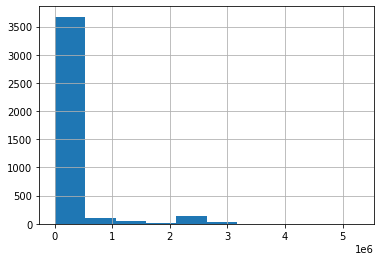

In [ ]:
itunes_df['Milliseconds'].hist()

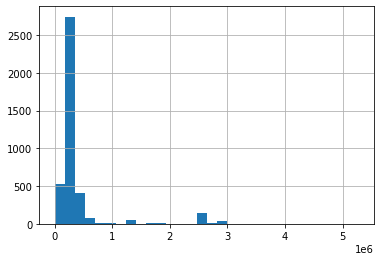

In [ ]:
itunes_df['Milliseconds'].hist(bins=30)

In [ ]:
1e6

1000000.0

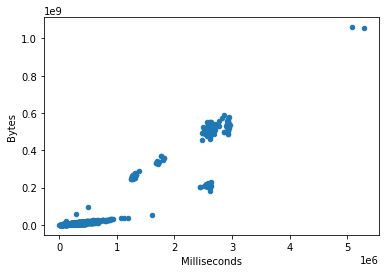

In [ ]:
itunes_df.plot.scatter(x='Milliseconds', y='Bytes')

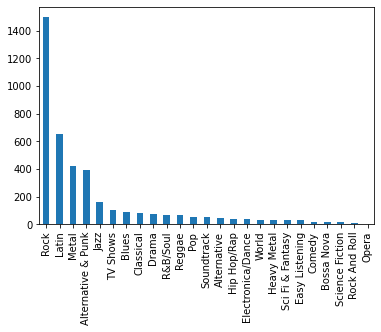

In [ ]:
itunes_df['Genre'].value_counts().plot.bar()

## Limpando Dados, Filtrando DataFrames

In [ ]:
itunes_df['Milliseconds'] > 4e6

0       False
1       False
2       False
3       False
4       False
        ...  
3498    False
3499    False
3500    False
3501    False
3502    False
Name: Milliseconds, Length: 4021, dtype: bool

In [ ]:
itunes_df[itunes_df['Milliseconds'] > 4e6]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
2833,Occupation / Precipice,None,5286953,1054423946,1.99,TV Shows,"Battlestar Galactica, Season 3",Battlestar Galactica
2898,Through a Looking Glass,None,5088838,1059546140,1.99,Drama,"Lost, Season 3",Lost


In [ ]:
itunes_df[itunes_df['Milliseconds'] > 4e6][['Genre', 'Artist']]

,Genre,Artist
2833,TV Shows,Battlestar Galactica
2898,Drama,Lost


Quais generos de musica tem tempos maiores?

In [ ]:
itunes_df[itunes_df['Milliseconds'] > 2e6]['Genre'].value_counts()

Drama               69
TV Shows            67
Sci Fi & Fantasy    31
Science Fiction     15
Comedy               2
Name: Genre, dtype: int64

In [ ]:
itunes_df[(itunes_df['Milliseconds'] > 2e6) & (itunes_df['Bytes'] < 0.4e9)]['Genre'].value_counts()

TV Shows    32
Name: Genre, dtype: int64

In [ ]:
itunes_df[itunes_df['Genre'] != 'TV Shows']['Genre'].value_counts()

Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
Blues                   92
Classical               85
Drama                   71
R&B/Soul                69
Reggae                  64
Pop                     51
Soundtrack              50
Alternative             45
Hip Hop/Rap             40
Electronica/Dance       35
World                   32
Sci Fi & Fantasy        31
Heavy Metal             31
Easy Listening          28
Comedy                  20
Bossa Nova              17
Science Fiction         15
Rock And Roll           12
Opera                    1
Name: Genre, dtype: int64

In [ ]:
itunes_df[itunes_df['Genre'].str.contains('TV')]['Genre'].value_counts()

TV Shows    105
Name: Genre, dtype: int64

In [ ]:
itunes_df[itunes_df['Genre'].str.contains('Rock')]['Genre'].value_counts()

Rock             1498
Rock And Roll      12
Name: Genre, dtype: int64

##Valores ausentes

Em termos de lidar com valores ausentes, temos algumas opções:
* Deixe os valores ausentes como estão
* Elimine os dados
* Preencha com um valor específico
* Substitua pela média, mediana ou moda
* Use o aprendizado de máquina para substituir valores ausentes

In [ ]:
itunes_df[itunes_df['Composer'].isna()].sample(5, random_state=42).head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
2947,Three Minutes,None,2763666,531556853,1.99,TV Shows,"Lost, Season 2",Lost
98,Romance Ideal,NaN,250070,8260477,0.99,Latin,Arquivo Os Paralamas Do Sucesso,Os Paralamas Do Sucesso
3327,Todo o Carnaval tem seu Fim,None,237426,9499371,0.99,Electronica/Dance,Radio Brasil (O Som da Jovem Vanguarda) - Sele...,O Rappa
2457,We've Got To Get Together/Jingo,None,1070027,34618222,0.99,Rock,Santana Live,Santana
587,Vamos Dançar,None,226194,7617432,0.99,Latin,The Best of Ed Motta,Ed Motta


Podemos descartar as linhas com valores ausentes

In [ ]:
itunes_df_copy = itunes_df.copy()  # make a backup for testing dropping a column
# print shapes to check that rows were dropped
print(itunes_df_copy.shape)
itunes_df_copy.dropna(inplace=True)
print(itunes_df_copy.shape)

(4021, 8)
(2908, 8)


In [ ]:
itunes_df_copy[itunes_df_copy['Composer'].isna()]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist


Preencher com algum valor

In [ ]:
itunes_df_copy = itunes_df.copy()  # make a backup for testing inserting in a column
itunes_df_copy[itunes_df['Composer'].isna()]['Composer'] = 'Unknown'
itunes_df_copy.head()

#não funciona

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


O correto é usar a função loc

In [ ]:
itunes_df_copy = itunes_df.copy()  # make a backup for testing inserting in a column
itunes_df_copy.loc[itunes_df['Composer'].isna(), 'Composer'] = 'Unknown'
itunes_df_copy.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,Unknown,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,Unknown,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),Unknown,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


In [ ]:
itunes_df_copy = itunes_df.copy()  # make a backup for testing dropping a column
itunes_df_copy['Composer'].fillna('Unknown', inplace=True)
itunes_df_copy.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,Unknown,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,Unknown,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),Unknown,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


Preencher valores ausentes numéricos com a moda faz sentido em casos em que os valores numéricos são restritos a alguns valores específicos. 


O importante é não distorcer as estatísticas descritivas de forma significativa.

In [ ]:
itunes_df.isna().sum()

Track              0
Composer        1113
Milliseconds       0
Bytes              0
UnitPrice          0
Genre              0
Album              0
Artist             0
dtype: int64

No momento não há valores numéricos ausentes, mas e se fosse necessário preencher valores de preços?

In [ ]:
itunes_df['UnitPrice'].value_counts()

0.99    3779
1.99     242
Name: UnitPrice, dtype: int64

In [ ]:
itunes_df['UnitPrice'].value_counts().iloc[0]/itunes_df.shape[0]

0.9398159661775678

In [ ]:
itunes_df_copy = itunes_df.copy()  # make a backup for testing dropping a column
itunes_df_copy['UnitPrice'].fillna(itunes_df_copy['UnitPrice'].mode(), inplace=True)
itunes_df_copy.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


Em outros casos, faz mais sentido usar a mediana (o percentil 50), o que significa usar algo como df['Column'].median(). A mediana é melhor quando temos uma distribuição assimétrica, como mostra a Figura:

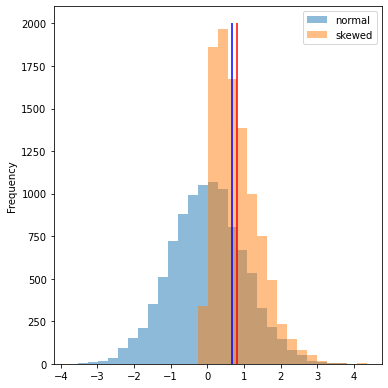

In [ ]:
# create distributions for plotting
from scipy.stats import skewnorm
df = pd.DataFrame({'normal': skewnorm.rvs(0, size=10000), 'skewed': skewnorm.rvs(10, size=10000)})

f = df.plot.hist(bins=30, alpha=0.5, figsize=(5.5, 5.5))
plt.vlines(df['skewed'].mean(), ymin=0, ymax=2000, label='mean', color='r')
plt.vlines(df['skewed'].median(), ymin=0, ymax=2000, label='median', color='b')
#f.patch.set_facecolor('w')  # sets background color behind axis labels
plt.tight_layout()  # auto-adjust margins

#### KNN imputation

k nearest neighbor

In [ ]:
import numpy as np
itunes_df_copy = itunes_df.copy()  # create copy of the dataframe so we don't alter the original


In [ ]:
itunes_df_copy.loc[0]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
0,My Time After Awhile,Robert Geddins/Ron Badger/Sheldon Feinberg,182491,6022698,0.99,Blues,The Best Of Buddy Guy - The Millenium Collection,Buddy Guy
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,Rock,For Those About To Rock We Salute You,AC/DC


In [ ]:
itunes_df_copy.loc[0, 'Bytes'] = np.nan

In [ ]:
itunes_df_copy.loc[0]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,NaN,1.99,TV Shows,"Lost, Season 1",Lost
0,My Time After Awhile,Robert Geddins/Ron Badger/Sheldon Feinberg,182491,NaN,0.99,Blues,The Best Of Buddy Guy - The Millenium Collection,Buddy Guy
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",343719,NaN,0.99,Rock,For Those About To Rock We Salute You,AC/DC


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputed = imputer.fit_transform(itunes_df_copy[['Milliseconds', 'Bytes', 'UnitPrice']])

valores originais

In [ ]:
# there are multiple values with the index value of 0, which is why we get multiple results
itunes_df.loc[0, 'Bytes']

0    211743651
0      6022698
0     11170334
Name: Bytes, dtype: int64

In [ ]:
itunes_df_copy['Bytes'] = imputed[:, 1]

In [ ]:
itunes_df_copy.loc[0, 'Bytes']

0    381737603.6
0      5454572.2
0     11232851.2
Name: Bytes, dtype: float64

## Tratando valores discrepantes (outliers)

Outliers são dados que não estão no intervalo normal de valores. Para dados categóricos, como os gêneros, essas podem ser algumas das classes minoritárias, como programas de TV. Podemos remover essas linhas com filtragem ou também agrupar todas as classes minoritárias em uma classe que rotulamos como Other. Lidar com outliers categóricos pode ajudar um pouco na análise, mas geralmente tem um impacto mínimo.

Para dados numéricos, é fácil quantificar um valor discrepante. Normalmente, usamos os métodos de intervalo interquartil (IQR) ou z-score

Nós obtemos quartis (25º, 50º, 75º percentis) da função describe() em nosso EDA. 

Às vezes, eles são chamados de primeiro, segundo e terceiro quartis, respectivamente (Q1, Q2 e Q3).

In [ ]:
itunes_df['Milliseconds'].describe()

count    4.021000e+03
mean     3.927276e+05
std      5.337745e+05
min      1.071000e+03
25%      2.069680e+05
50%      2.554770e+05
75%      3.217240e+05
max      5.286953e+06
Name: Milliseconds, dtype: float64

O método IQR usa esses níveis de quartil para detectar valores discrepantes. A fórmula é:

IQR = percentil_75 - percentil_25

O limites para valores discrepantes não:

* limite_superior = percentil_75 + 1.5 * IQR
* limite_inferior = percentil_25 - 1.5 * IQR

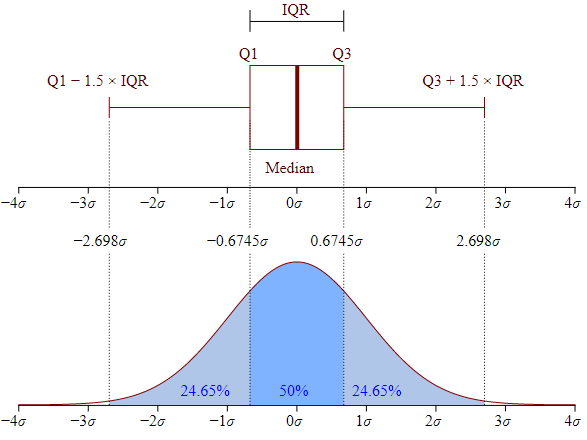

In [ ]:
q1 = itunes_df['Milliseconds'].quantile(0.25)
q3 = itunes_df['Milliseconds'].quantile(0.75)
print("q1: ", q1)
print("q3: ", q3)

q1:  206968.0
q3:  321724.0


In [ ]:
iqr = q3 - q1
print(iqr)

114756.0


In [ ]:
upper_boundary = q3 + 1.5 * iqr

In [ ]:
upper_boundary

493858.0

In [ ]:
itunes_df.loc[(itunes_df['Milliseconds'] > upper_boundary)]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
23,Confidence Man,NaN,2615244,223756475,1.99,TV Shows,"Lost, Season 1",Lost
38,Diwali,NaN,1279904,252726644,1.99,TV Shows,"The Office, Season 3",The Office
54,Blind Curve: Vocal Under A Bloodlight / Passin...,"Kelly, Mosley, Rothery, Trewaves",569704,18578995,0.99,Rock,Misplaced Childhood,Marillion
...,...,...,...,...,...,...,...,...
3434,"Concerto for Piano No. 2 in F Minor, Op. 21: I...",Frédéric Chopin,560342,9160082,0.99,Classical,Chopin: Piano Concertos Nos. 1 & 2,"Emanuel Ax, Eugene Ormandy & Philadelphia Orch..."
3444,On the Beautiful Blue Danube,Johann Strauss II,526696,8610225,0.99,Classical,Strauss: Waltzes,Eugene Ormandy
3445,"Symphonie Fantastique, Op. 14: V. Songe d'une ...",Hector Berlioz,561967,9173344,0.99,Classical,Berlioz: Symphonie Fantastique,Michael Tilson Thomas & San Francisco Symphony
3477,Amy Amy Amy (Outro),"Astor Campbell, Delroy ""Chris"" Cooper, Donovan...",663426,10564704,0.99,Pop,Frank,Amy Winehouse


In [ ]:
lower_boundary = q1 - 1.5 * iqr
lower_boundary

34834.0

In [ ]:
itunes_df_copy = itunes_df.copy()
itunes_df_copy = itunes_df_copy.loc[
    (itunes_df['Milliseconds'] > lower_boundary) &
    (itunes_df['Milliseconds'] < upper_boundary)
    ]

In [ ]:
itunes_df_copy.shape

(3614, 8)

In [ ]:
q99 = itunes_df['Milliseconds'].quantile(0.99)

In [ ]:
# adapted from this SO answer: https://stackoverflow.com/a/46740476/4549682
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_boundary = q3 + 1.5 * iqr
    lower_boundary = q1 - 1.5 * iqr
    new_df = df.loc[(df[column] > lower_boundary) & (df[column] < upper_boundary)]
    return new_df

A remoção de valores discrepantes pode facilitar a visualização de dados e melhorar o desempenho dos modelos de aprendizado de máquina. 

Outra maneira fácil de remover valores discrepantes é excluir quaisquer pontos de dados que estejam fora dos percentis extremos nos dados. Por exemplo, poderíamos remover quaisquer pontos fora dos percentis 1 e 99, o que significa que mantemos apenas os 98% médios dos dados.

## Atividade

Identifique as amostras com valores discrepantes de bytes usando o IQR básico

### Resposta

In [ ]:
q1 = itunes_df['Bytes'].quantile(0.25)
q3 = itunes_df['Bytes'].quantile(0.75)
iqr = q3 - q1

In [ ]:
iqr

3878995.0

In [ ]:
limite_superior = q3 + 1.5 * iqr
limite_inferior = q1 - 1.5 * iqr

In [ ]:
itunes_df_copy = itunes_df.copy()
itunes_df_copy = itunes_df_copy.loc[
    (itunes_df_copy['Bytes'] < limite_inferior) |
    (itunes_df_copy['Bytes'] > limite_superior)
    ]
itunes_df_copy.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
21,Oprah,NaN,6635,224313,0.99,Alternative & Punk,Body Count,Body Count
23,Confidence Man,NaN,2615244,223756475,1.99,TV Shows,"Lost, Season 1",Lost
36,The Real Problem,NaN,11650,387360,0.99,Alternative & Punk,Body Count,Body Count


### Valores duplicados

É sempre uma boa ideia verificar valores duplicados, pois eles podem se infiltrar nos dados de várias maneiras.

In [ ]:
itunes_df.shape

(4021, 8)

In [ ]:
itunes_df.duplicated().sum()

518

In [ ]:
itunes_df.drop_duplicates(inplace=True)

In [ ]:
itunes_df.shape

(3503, 8)

## Transformações de dados

Transformações de dados simples em pandas são fáceis, como operações matemáticas básicas. Por exemplo, podemos converter milissegundos em segundos assim:

In [ ]:
itunes_df['Seconds'] = itunes_df['Milliseconds'] / 1000

In [ ]:
itunes_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist,Seconds
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost,2555.492
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton,295.444
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento,155.428
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office,1271.938
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos,231.993


Se quiséssemos criar outra coluna, digamos, a proporção entre o comprimento da música e os bytes, poderíamos fazer assim:

In [ ]:
itunes_df['len_byte_ratio'] = itunes_df['Milliseconds'] / itunes_df['Bytes']

In [ ]:
itunes_df['len_byte_ratio'].head()

0    0.012069
1    0.030782
2    0.029591
3    0.004815
4    0.030158
Name: len_byte_ratio, dtype: float64

### Apply e Map

In [ ]:
itunes_df['Genre'].value_counts()

Rock                  1297
Latin                  579
Metal                  374
Alternative & Punk     332
Jazz                   130
TV Shows                93
Blues                   81
Classical               74
Drama                   64
R&B/Soul                61
Reggae                  58
Pop                     48
Soundtrack              43
Alternative             40
Hip Hop/Rap             35
Electronica/Dance       30
Heavy Metal             28
World                   28
Sci Fi & Fantasy        26
Easy Listening          24
Comedy                  17
Bossa Nova              15
Science Fiction         13
Rock And Roll           12
Opera                    1
Name: Genre, dtype: int64

Digamos que o dataset tivesse o mesmo genero com grafias diferentes

In [ ]:
genre_dict = {'metal': 'Metal', 'met': 'Metal'}
itunes_df['Genre'].replace(genre_dict)

0         TV Shows
1            Latin
2            Latin
3           Comedy
4            Latin
           ...    
3496     Classical
3499     Classical
3500     Classical
3501     Classical
3502    Soundtrack
Name: Genre, Length: 3503, dtype: object

In [ ]:
genre_dict = {'Rock And Roll': 'Rock'}
itunes_df['Genre'].replace(genre_dict, inplace=True)

In [ ]:
itunes_df['Genre'].value_counts()

Rock                  1309
Latin                  579
Metal                  374
Alternative & Punk     332
Jazz                   130
TV Shows                93
Blues                   81
Classical               74
Drama                   64
R&B/Soul                61
Reggae                  58
Pop                     48
Soundtrack              43
Alternative             40
Hip Hop/Rap             35
Electronica/Dance       30
Heavy Metal             28
World                   28
Sci Fi & Fantasy        26
Easy Listening          24
Comedy                  17
Bossa Nova              15
Science Fiction         13
Opera                    1
Name: Genre, dtype: int64

Outra ferramenta útil é a função de aplicação, que é uma função de canivete suíço – ela pode fazer qualquer coisa. Por exemplo

In [ ]:
itunes_df['Genre'].apply(lambda x: x.lower())

0         tv shows
1            latin
2            latin
3           comedy
4            latin
           ...    
3496     classical
3499     classical
3500     classical
3501     classical
3502    soundtrack
Name: Genre, Length: 3503, dtype: object

uma função lambda é uma função "anônima", criada na hora. Ela começa com a palavra-chave lambda, depois é seguida pelas entradas como nomes de variáveis, depois um caractere de dois pontos e, finalmente, a função real.

outra forma de fazer o mesmo

In [ ]:
# the above is the same as this
def lowercase(x):
    return x.lower()

itunes_df['Genre'].apply(lowercase)

0         tv shows
1            latin
2            latin
3           comedy
4            latin
           ...    
3496     classical
3499     classical
3500     classical
3501     classical
3502    soundtrack
Name: Genre, Length: 3503, dtype: object

In [ ]:
# but using built-in functions is almost always faster
itunes_df['Genre'].str.lower()

0         tv shows
1            latin
2            latin
3           comedy
4            latin
           ...    
3496     classical
3499     classical
3500     classical
3501     classical
3502    soundtrack
Name: Genre, Length: 3503, dtype: object

### Group By

In [ ]:
itunes_df.groupby('Genre').mean()

,Milliseconds,Bytes,UnitPrice,Seconds,len_byte_ratio
Genre,,,,,
Alternative,2.640585e+05,5.883474e+06,0.99,264.058525,0.058276
Alternative & Punk,2.343538e+05,7.691003e+06,0.99,234.353849,0.030459
Blues,2.703598e+05,8.625576e+06,0.99,270.359778,0.031631
Bossa Nova,2.195900e+05,7.239057e+06,0.99,219.590000,0.030340
Classical,2.938676e+05,5.220907e+06,0.99,293.867568,0.057609
Comedy,1.585264e+06,3.169045e+08,1.99,1585.263706,0.005010
Drama,2.575284e+06,5.069470e+08,1.99,2575.283781,0.005097
Easy Listening,1.891642e+05,6.160518e+06,0.99,189.164208,0.030695
Electronica/Dance,3.029858e+05,1.069193e+07,0.99,302.985800,0.029232


Por exemplo, podemos ver a duração média das músicas por
gênero

In [ ]:
itunes_df.groupby('Genre').mean()['Seconds'].sort_values().head()

Genre
Opera             174.813000
Hip Hop/Rap       178.176286
Easy Listening    189.164208
Bossa Nova        219.590000
R&B/Soul          220.066852
Name: Seconds, dtype: float64

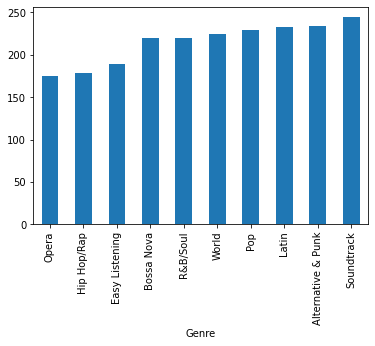

In [ ]:
itunes_df.groupby('Genre')['Seconds'].mean().sort_values().head(10).plot.bar()

### Salvando dados

In [ ]:
itunes_df.to_csv('cleaned_itunes_data.csv', index=False)